In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import prepare
import acquire


import warnings
warnings.filterwarnings('ignore')

In [2]:
telco = acquire.get_telco_data()

In [3]:
telco = prepare.prep_telco(telco)

In [8]:
telco.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'contract_type', 'internet_service_type', 'churn_Yes',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_Yes', 'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'paperless_billing_Yes',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

In [5]:
train, val, test = prepare.my_train_test_split(telco, 'churn_Yes')

In [6]:
train.shape, val.shape, test.shape

((4225, 30), (1409, 30), (1409, 30))

In [10]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,0,26,39.95,1023.75,One year,DSL,0,1,0,...,0,1,0,1,0,0,1,0,0,0
2479,3547-LQRIK,0,47,26.90,1250.85,One year,None,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5889,8280-MQRQN,0,1,50.45,50.45,Month-to-month,DSL,1,0,0,...,1,0,0,1,0,0,0,0,0,1
6087,8626-PTQGE,0,69,60.05,4176.70,Two year,DSL,0,1,0,...,0,0,1,1,0,0,1,0,0,0
785,1142-IHLOO,0,51,87.55,4475.90,One year,Fiber optic,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [12]:
X_train = train.drop(columns=['churn_Yes', 'contract_type', 'customer_id', 'internet_service_type'])
y_train = train.churn_Yes

X_val = val.drop(columns=['churn_Yes', 'contract_type', 'customer_id', 'internet_service_type'])
y_val = val.churn_Yes

X_test = test.drop(columns=['churn_Yes', 'contract_type', 'customer_id', 'internet_service_type'])
y_test = test.churn_Yes

In [29]:
telco['baseline'] = telco['churn_Yes'].value_counts().idxmax()

In [30]:
(telco['churn_Yes'] == telco['baseline']).mean()

0.7346301292063041

In [169]:
(telco['churn_Yes'] == telco['baseline']).mean()

0.7346301292063041

In [62]:
seed = 42
clf1 = DecisionTreeClassifier(max_depth=3, random_state=42)

In [63]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [172]:
clf1.fit(X_val, y_val)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [64]:
clf1.score(X_train, y_train)

0.7879289940828402

In [173]:
clf1.score(X_val, y_val)

0.7977288857345636

In [65]:
val_preds1 = clf1.predict(X_val)

In [66]:
print(classification_report(y_val, val_preds1))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1035
           1       0.70      0.39      0.50       374

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409



In [67]:
seed = 42
clf2 = DecisionTreeClassifier(max_depth=6, random_state=42)

In [68]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [174]:
clf2.fit(X_val, y_val)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [69]:
clf2.score(X_train, y_train)

0.8139644970414202

In [175]:
clf2.score(X_val, y_val)

0.8388928317955997

In [70]:
val_preds2 = clf2.predict(X_val)

In [71]:
print(classification_report(y_val, val_preds2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.63      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [72]:
seed = 42
clf3 = DecisionTreeClassifier(max_depth=9, random_state=42)

In [73]:
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [176]:
clf3.fit(X_val, y_val)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [74]:
clf3.score(X_train, y_train)

0.8575147928994082

In [177]:
clf3.score(X_val, y_val)

0.9070262597586941

In [75]:
val_preds3 = clf3.predict(X_val)

In [76]:
print(classification_report(y_val, val_preds3))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.54      0.56       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In [18]:
seed=42

rf = RandomForestClassifier(max_depth=3, random_state=42,
                            max_samples=0.5)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_samples=0.5, random_state=42)

In [20]:
rf.score(X_train, y_train)

0.7853254437869822

In [21]:
rf.score(X_val, y_val)

0.7835344215755855

In [22]:
rf.feature_importances_

array([0.0044534 , 0.19477786, 0.06572132, 0.0777949 , 0.00035268,
       0.00547427, 0.00481942, 0.00118334, 0.0015439 , 0.01991752,
       0.00499943, 0.00087789, 0.01311585, 0.00265045, 0.00309563,
       0.02657618, 0.2360173 , 0.01917209, 0.06150494, 0.01157904,
       0.12394701, 0.02924966, 0.00305576, 0.00304351, 0.08189897,
       0.00317768])

In [23]:
importance_df = pd.DataFrame({'feature': X_train.columns.tolist(),
              'importance': rf.feature_importances_})

In [24]:
importance_df.sort_values('importance', ascending=False)

,feature,importance
16,contract_type_Month-to-month,0.236017
1,tenure,0.194778
20,internet_service_type_Fiber optic,0.123947
24,payment_type_Electronic check,0.081899
3,total_charges,0.077795
2,monthly_charges,0.065721
18,contract_type_Two year,0.061505
21,internet_service_type_None,0.029250
15,paperless_billing_Yes,0.026576
9,online_security_Yes,0.019918


In [77]:
seed=42

rf2 = RandomForestClassifier(max_depth=5, random_state=42,
                            max_samples=0.5)

In [78]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_samples=0.5, random_state=42)

In [79]:
rf2.score(X_train, y_train)

0.808284023668639

In [80]:
rf2.score(X_val, y_val)

0.8026969481902059

In [81]:
rf2.feature_importances_

array([0.00695798, 0.1920451 , 0.0819686 , 0.0950614 , 0.00208595,
       0.00770562, 0.00790093, 0.00592475, 0.00471223, 0.01591007,
       0.0062639 , 0.00306831, 0.0096559 , 0.00519321, 0.00511255,
       0.02215915, 0.19819149, 0.02327167, 0.05545927, 0.01665904,
       0.11652753, 0.03004392, 0.00438303, 0.0057664 , 0.07229806,
       0.00567393])

In [82]:
importance_df2 = pd.DataFrame({'feature': X_train.columns.tolist(),
              'importance': rf2.feature_importances_})

In [83]:
importance_df2.sort_values('importance', ascending=False)

,feature,importance
16,contract_type_Month-to-month,0.198191
1,tenure,0.192045
20,internet_service_type_Fiber optic,0.116528
3,total_charges,0.095061
2,monthly_charges,0.081969
24,payment_type_Electronic check,0.072298
18,contract_type_Two year,0.055459
21,internet_service_type_None,0.030044
17,contract_type_One year,0.023272
15,paperless_billing_Yes,0.022159


In [84]:
seed=42

rf3 = RandomForestClassifier(max_depth=8, random_state=42,
                            max_samples=0.5)

In [85]:
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_samples=0.5, random_state=42)

In [86]:
rf3.score(X_train, y_train)

0.8333727810650887

In [87]:
rf3.score(X_val, y_val)

0.8048261178140526

In [88]:
rf3.feature_importances_

array([0.01426633, 0.18410868, 0.11865523, 0.13505508, 0.01306681,
       0.0145405 , 0.01410231, 0.00761206, 0.01391741, 0.01846823,
       0.01398329, 0.00980758, 0.0160142 , 0.01171698, 0.01265989,
       0.02711602, 0.12648933, 0.0191727 , 0.03626982, 0.01792013,
       0.07630921, 0.01817316, 0.00769618, 0.00791016, 0.05440456,
       0.01056415])

In [89]:
importance_df3 = pd.DataFrame({'feature': X_train.columns.tolist(),
              'importance': rf3.feature_importances_})

In [90]:
importance_df3.sort_values('importance', ascending=False)

,feature,importance
1,tenure,0.184109
3,total_charges,0.135055
16,contract_type_Month-to-month,0.126489
2,monthly_charges,0.118655
20,internet_service_type_Fiber optic,0.076309
24,payment_type_Electronic check,0.054405
18,contract_type_Two year,0.036270
15,paperless_billing_Yes,0.027116
17,contract_type_One year,0.019173
9,online_security_Yes,0.018468


In [92]:
knn1 = KNeighborsClassifier(n_neighbors=5)

In [93]:
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
knn1.score(X_train, y_train)

0.831715976331361

In [95]:
knn1.score(X_val, y_val)

0.7771469127040455

In [96]:
knn2 = KNeighborsClassifier(n_neighbors=8)

In [97]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [98]:
knn2.score(X_train, y_train)

0.8123076923076923

In [99]:
knn2.score(X_val, y_val)

0.7806955287437899

In [108]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [109]:
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [110]:
knn3.score(X_train, y_train)

0.8565680473372781

In [111]:
knn3.score(X_val, y_val)

0.7622427253371186

In [178]:
seed = 42

logit = LogisticRegression(C=.1, class_weight={0:1, 1:99}, 
                           random_state=seed, intercept_scaling=1,
                          solver='lbfgs')

#fit the model
logit.fit(X_train, y_train)

#make predictions
logit_pred = logit.predict(X_train)

In [113]:
#evaluate the importance (weight) of each feature
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 2.55225134e-01 -2.90118291e-02  3.38363315e-02  5.82293257e-05
   3.12864663e-01 -1.51360337e-01 -1.76451472e-01 -1.69836381e-01
  -1.60515048e-01 -4.07383577e-01 -3.83112101e-02 -9.87264711e-02
  -3.92179143e-01  1.06988083e-02  9.59168548e-02  4.89506996e-01
   1.22381098e+00  1.48929604e-02 -5.38231126e-01  4.46835617e-01
  -4.97504470e-02  3.03387649e-01 -1.48606943e-02  2.74533987e-02
   6.69887016e-01  1.79930982e-02]]
Intercept: 
 [0.7080834]


In [114]:
#estimate probability
logit_pred_proba = logit.predict_proba(X_train)

In [116]:
logit_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [117]:
logit_pred_proba

array([[0.08238873, 0.91761127],
       [0.30279642, 0.69720358],
       [0.01340495, 0.98659505],
       ...,
       [0.00424531, 0.99575469],
       [0.23579145, 0.76420855],
       [0.06728427, 0.93271573]])

In [118]:
logit.score(X_train, y_train)

0.33656804733727813

In [119]:
print(classification_report(y_train, logit_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18      3104
           1       0.29      1.00      0.44      1121

    accuracy                           0.34      4225
   macro avg       0.64      0.55      0.31      4225
weighted avg       0.81      0.34      0.25      4225



In [120]:
#creating the object
logit2 = LogisticRegression(C=.1, random_state=42, 
                           intercept_scaling=1, solver='lbfgs')

#fit the model
logit2.fit(X_train, y_train)

#make predictions
logit_pred2 = logit2.predict(X_train)

In [121]:
logit2.score(X_train, y_train)

0.8009467455621302

In [122]:
#estimate probability
logit_pred_proba2 = logit2.predict_proba(X_train)

In [123]:
print(classification_report(y_train, logit_pred2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3104
           1       0.65      0.53      0.59      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.71      0.73      4225
weighted avg       0.79      0.80      0.79      4225



In [124]:
#creating the object
logit3 = LogisticRegression(random_state=42, intercept_scaling=1, 
                            solver='lbfgs')

#fit the model
logit3.fit(X_train, y_train)

#make predictions
logit_pred3 = logit3.predict(X_train)

In [125]:
logit3.score(X_train, y_train)

0.7955029585798816

In [126]:
print(classification_report(y_train, logit_pred3))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3104
           1       0.65      0.50      0.56      1121

    accuracy                           0.80      4225
   macro avg       0.74      0.70      0.71      4225
weighted avg       0.78      0.80      0.79      4225



In [131]:
clf1.score(X_val, y_val)

0.7927608232789212

In [129]:
clf2.score(X_val, y_val)

0.7977288857345636

In [130]:
clf3.score(X_val, y_val)

0.772888573456352

In [133]:
rf.score(X_val, y_val)

0.7835344215755855

In [134]:
rf2.score(X_val, y_val)

0.8026969481902059

In [135]:
rf3.score(X_val, y_val)

0.8048261178140526

In [137]:
knn1.score(X_val, y_val)

0.7771469127040455

In [138]:
knn2.score(X_val, y_val)

0.7806955287437899

In [139]:
knn3.score(X_val, y_val)

0.7622427253371186

In [141]:
logit.score(X_val, y_val)

0.3420865862313698

In [142]:
logit2.score(X_val, y_val)

0.8168914123491838

In [143]:
logit3.score(X_val, y_val)

0.8034066713981547

In [144]:
logit2.score(X_test, y_test)

0.8204400283889283

In [180]:
rf3.score(X_test, y_test)

0.8183108587650816

In [145]:
logit_test_proba = logit2.predict_proba(X_test)

In [146]:
logit_test_proba = pd.DataFrame(logit_test_proba)

In [147]:
logit_test_pred = logit2.predict(X_test)

In [148]:
logit_test_pred = pd.DataFrame(logit_test_pred)

In [149]:
test_cust_id = test['customer_id']

In [150]:
#customer ids from test data
test_cust_id

3160    4531-AUZNK
1577    2296-DKZFP
6823    9692-TUSXH
3615    5129-JLPIS
882     1273-MTETI
           ...    
1097    1597-FZREH
6441    9117-SHLZX
5985    8441-SHIPE
2452    3511-BFTJW
983     1428-GTBJJ
Name: customer_id, Length: 1409, dtype: object

In [151]:
logit_test_proba = logit_test_proba.drop(columns=0)

In [152]:
logit_test_proba

,1
0,0.106819
1,0.011283
2,0.600696
3,0.498114
4,0.783777
...,...
1404,0.465854
1405,0.459699
1406,0.005416
1407,0.004820


In [153]:
logit_test_pred

,0
0,0
1,0
2,1
3,0
4,1
...,...
1404,0
1405,0
1406,0
1407,0


In [154]:
predictions = pd.DataFrame(test_cust_id)

In [155]:
predictions.reset_index(inplace=True)

In [156]:
predictions = pd.concat([predictions, 
                         logit_test_proba, 
                         logit_test_pred], axis=1)

In [157]:
predictions = predictions.drop(columns='index')

In [158]:
predictions

,customer_id,1,0
0,4531-AUZNK,0.106819,0
1,2296-DKZFP,0.011283,0
2,9692-TUSXH,0.600696,1
3,5129-JLPIS,0.498114,0
4,1273-MTETI,0.783777,1
...,...,...,...
1404,1597-FZREH,0.465854,0
1405,9117-SHLZX,0.459699,0
1406,8441-SHIPE,0.005416,0
1407,3511-BFTJW,0.004820,0


In [159]:

predictions = predictions.rename(columns= {1: 'probability_of_churn', 
                                           0: 'prediction_of_churn'})

In [160]:
predictions

,customer_id,probability_of_churn,prediction_of_churn
0,4531-AUZNK,0.106819,0
1,2296-DKZFP,0.011283,0
2,9692-TUSXH,0.600696,1
3,5129-JLPIS,0.498114,0
4,1273-MTETI,0.783777,1
...,...,...,...
1404,1597-FZREH,0.465854,0
1405,9117-SHLZX,0.459699,0
1406,8441-SHIPE,0.005416,0
1407,3511-BFTJW,0.004820,0


In [161]:
(predictions['prediction_of_churn'] == 1).mean()

0.22356281050390348

In [162]:
predictions.to_csv('predictions.csv')

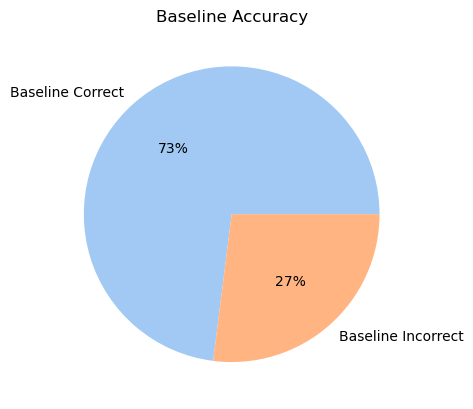

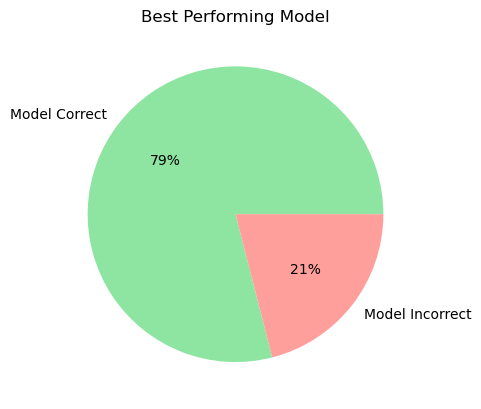

In [181]:
telco = [73, 27]
labels = ['Baseline Correct', 'Baseline Incorrect']

colors = sns.color_palette('pastel')[0:2]

plt.pie(telco, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Baseline Accuracy")
plt.show()

telco1 = [79, 21]
labels1 = ['Model Correct', 'Model Incorrect']

colors = sns.color_palette('pastel')[2:4]

plt.pie(telco1, labels=labels1, colors=colors, autopct='%.0f%%')
plt.title("Best Performing Model")
plt.show()